## naive_byes_multinomial_bernoulli_demo ##

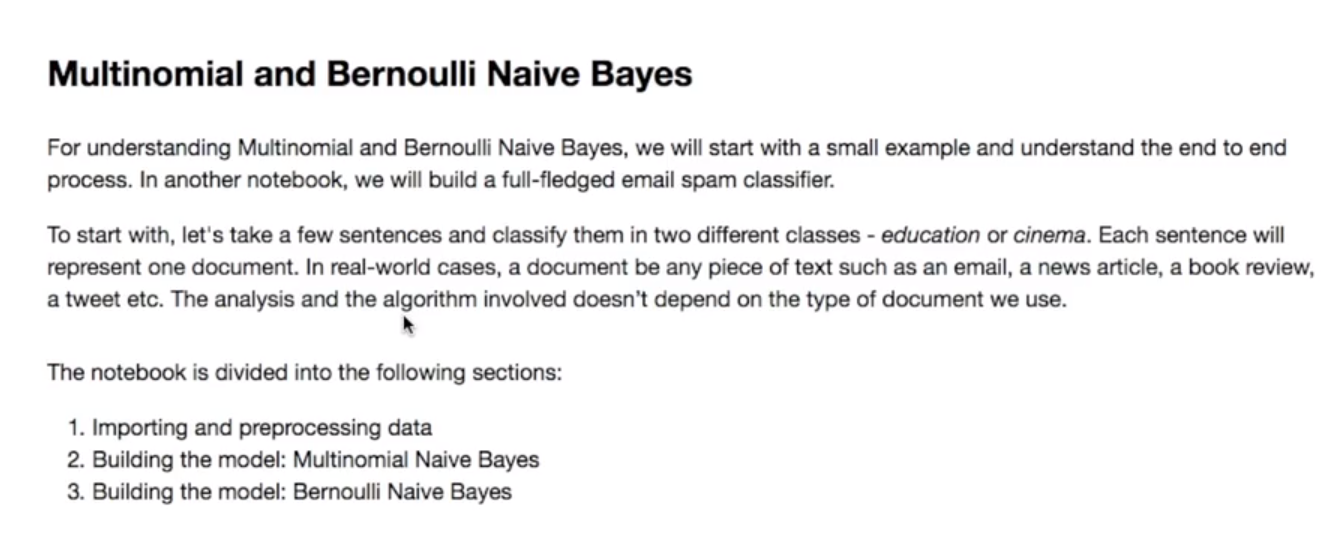

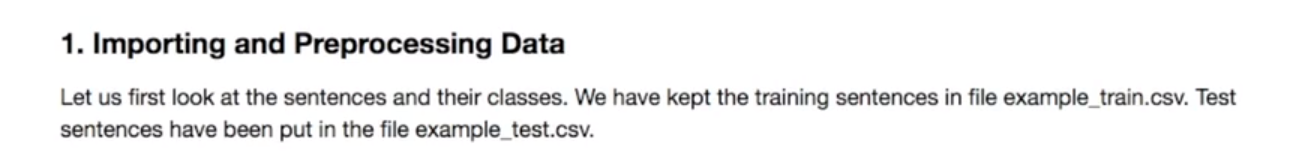

In [77]:
import numpy as np
import pandas as pd
import sklearn

#training data 
train_docs  = pd.read_csv('example_train.csv')
train_docs

,Document,Class
0,Upgrad is a great educational institution.,education
1,Educational greatness depends on ethics,education
2,A story of great ethics and educational greatness,education
3,Sholey is a great cinema,cinema
4,good movie depends on good story,cinema


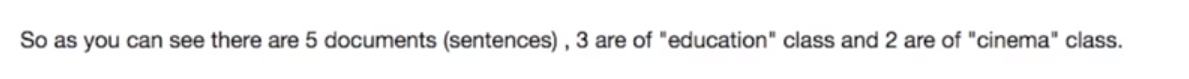

In [78]:
# convert the label to a numerical variables
train_docs['Class'] = train_docs.Class.map({'cinema':0, 'education':1})
train_docs

,Document,Class
0,Upgrad is a great educational institution.,1
1,Educational greatness depends on ethics,1
2,A story of great ethics and educational greatness,1
3,Sholey is a great cinema,0
4,good movie depends on good story,0


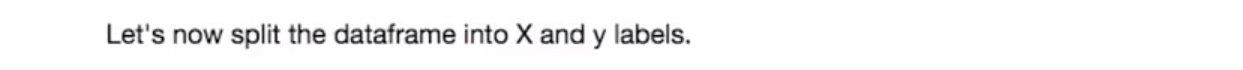

In [79]:
# convert df into numpy array
train_array = train_docs.values

# split X and y
X_train = train_array[:,0]
y_train = train_array[:,1]
y_train = y_train.astype('int')  # sklearn need y as integers

print("X_train")
print(X_train)
print("y_train")
print(y_train)

X_train
['Upgrad is a great educational institution.'
 'Educational greatness depends on ethics'
 'A story of great ethics and educational greatness'
 'Sholey is a great cinema' 'good movie depends on good story']
y_train
[1 1 1 0 0]


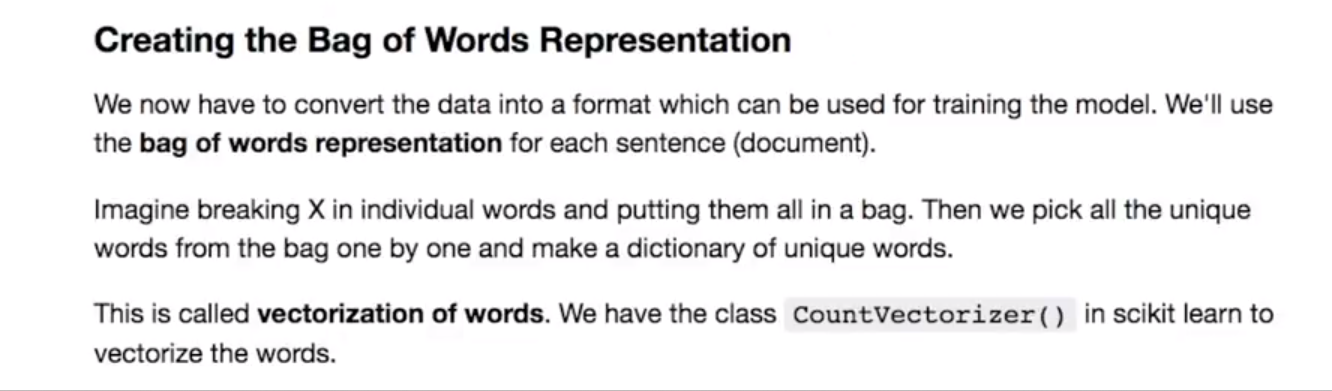

In [80]:
# create an object of CountVectorizer() class

from sklearn.feature_extraction.text import CountVectorizer
# help(CountVectorizer)

In [81]:
vec = CountVectorizer()

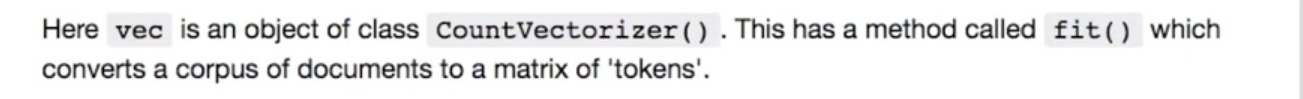

In [82]:
# fit the vectorizer on training data

vec.fit(X_train)
vec.vocabulary_

{'upgrad': 15,
 'is': 9,
 'great': 6,
 'educational': 3,
 'institution': 8,
 'greatness': 7,
 'depends': 2,
 'on': 12,
 'ethics': 4,
 'story': 14,
 'of': 11,
 'and': 0,
 'sholey': 13,
 'cinema': 1,
 'good': 5,
 'movie': 10}

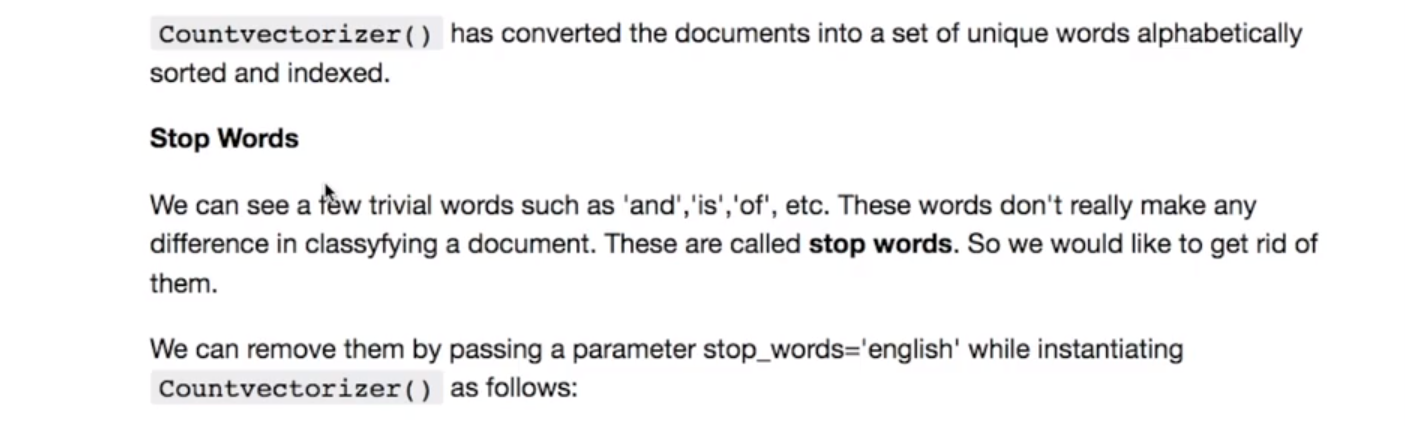

In [83]:
# fitting the vectorizer on training data again
# removing the stop words this time
vec = CountVectorizer(stop_words='english')
vec.fit(X_train)
vec.vocabulary_

{'upgrad': 11,
 'great': 5,
 'educational': 2,
 'institution': 7,
 'greatness': 6,
 'depends': 1,
 'ethics': 3,
 'story': 10,
 'sholey': 9,
 'cinema': 0,
 'good': 4,
 'movie': 8}

In [84]:
# printing feature names

print(vec.get_feature_names_out())
print(len(vec.get_feature_names_out()))

['cinema' 'depends' 'educational' 'ethics' 'good' 'great' 'greatness'
 'institution' 'movie' 'sholey' 'story' 'upgrad']
12


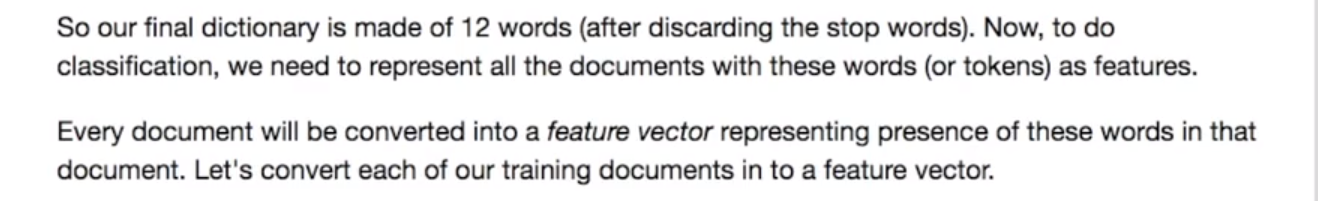

In [85]:
# another way of representing the features

X_transformed = vec.transform(X_train)
X_transformed

<5x12 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

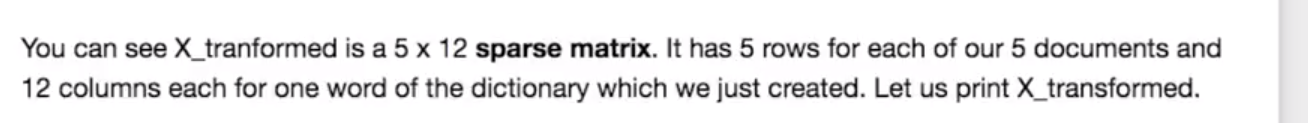

In [86]:
print(X_transformed)

  (0, 2)	1
  (0, 5)	1
  (0, 7)	1
  (0, 11)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	1
  (1, 6)	1
  (2, 2)	1
  (2, 3)	1
  (2, 5)	1
  (2, 6)	1
  (2, 10)	1
  (3, 0)	1
  (3, 5)	1
  (3, 9)	1
  (4, 1)	1
  (4, 4)	2
  (4, 8)	1
  (4, 10)	1


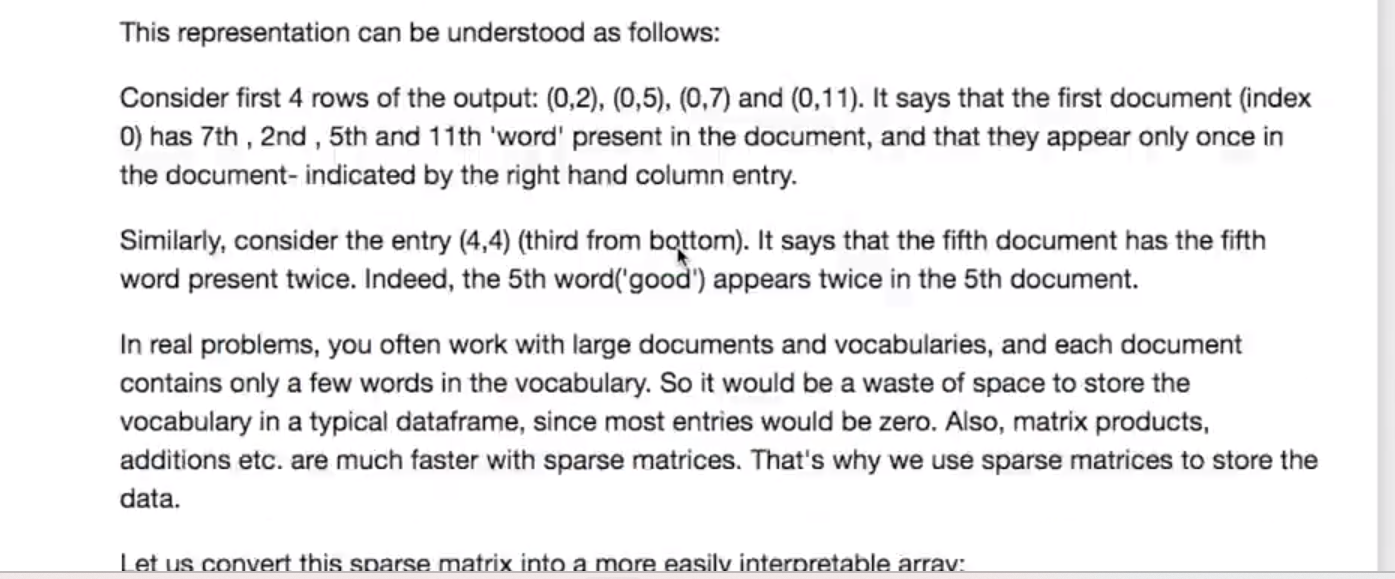

In [87]:
# converting transformed matrix back to an array
# note the high number of zeoros
X_transformed.toarray()

array([[0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0]], dtype=int64)

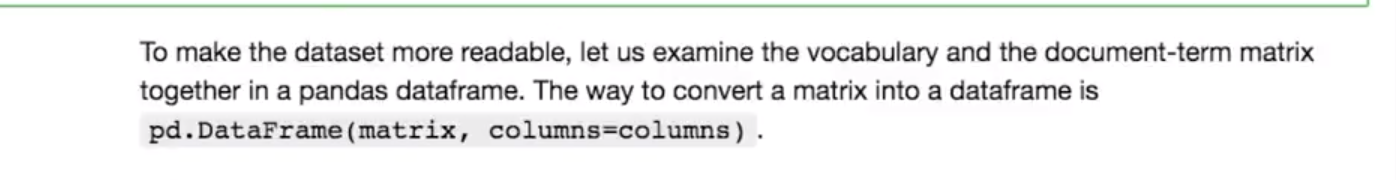

In [88]:
#converting matrix to dataframe
pd.DataFrame(X_transformed.toarray(), columns=vec.get_feature_names_out())

,cinema,depends,educational,ethics,good,great,greatness,institution,movie,sholey,story,upgrad
0,0,0,1,0,0,1,0,1,0,0,0,1
1,0,1,1,1,0,0,1,0,0,0,0,0
2,0,0,1,1,0,1,1,0,0,0,1,0
3,1,0,0,0,0,1,0,0,0,1,0,0
4,0,1,0,0,2,0,0,0,1,0,1,0


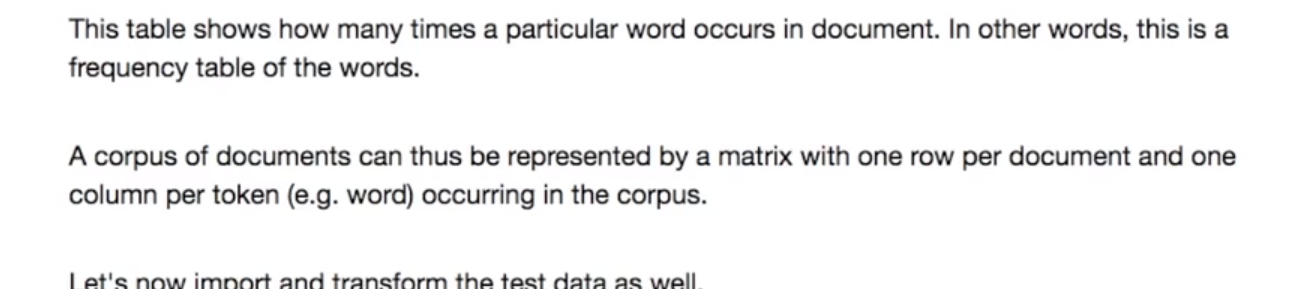    

In [89]:
# test data
test_docs = pd.read_csv('example_test.csv')
test_docs

,Document,Class
0,very good educational institution,education


In [90]:
# convert label to a numerical variable
test_docs['Class'] = test_docs.Class.map({'cinema':0, 'education':1})
test_docs

,Document,Class
0,very good educational institution,1


In [91]:
# convert to numpy array
test_numpy_array = test_docs.values

# split X and y
X_test = test_numpy_array[:,0]
y_test = test_numpy_array[:,1]
y_test = y_test.astype('int')  # sklearn need y as integers

print("X_test")
print(X_test)
print("y_test")
print(y_test)


X_test
['very good educational institution']
y_test
[1]


In [92]:
X_test_transformed = vec.transform(X_test)  
X_test_transformed

<1x12 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [93]:
# convert to non-sparse array
X_test=X_test_transformed.toarray()
X_test

array([[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0]], dtype=int64)

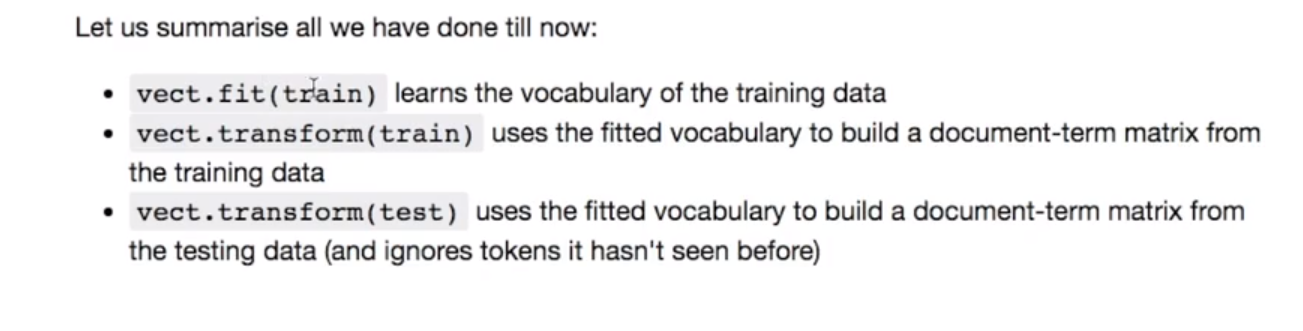